In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("china_gdp.csv")
df.head(10)


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


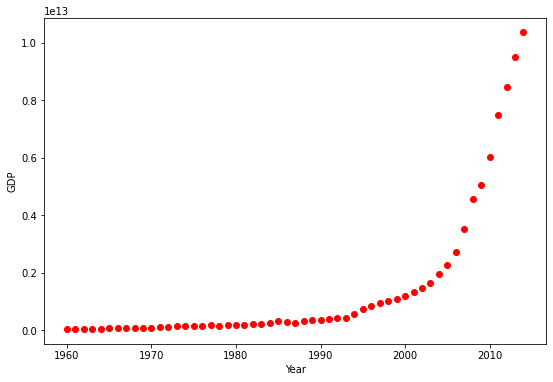

In [14]:
plt.figure(figsize=(9, 6))

x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


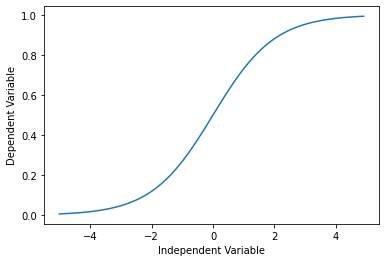

In [17]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [18]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [68]:
# Wrong!

from scipy.optimize import curve_fit


popt, pcov = curve_fit(sigmoid, x_data, y_data)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 1.000000, beta_2 = 1.000000


C:\Program Files\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [69]:
# Normalizing our dara :D

n_x_data = x_data / max(x_data)
n_y_data = y_data / max(y_data)

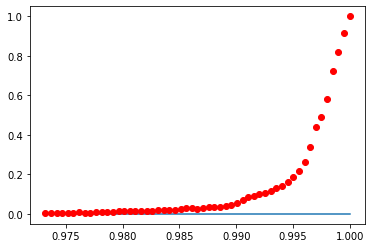

In [70]:

beta_1 = 0.27
beta_2 = 2011
Y_pred = sigmoid(n_x_data, beta_1 , beta_2)

plt.plot(n_x_data, Y_pred*15000000000000.)
plt.plot(n_x_data, n_y_data, 'ro')

In [71]:
from scipy.optimize import curve_fit


popt, pcov = curve_fit(sigmoid, n_x_data, n_y_data)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


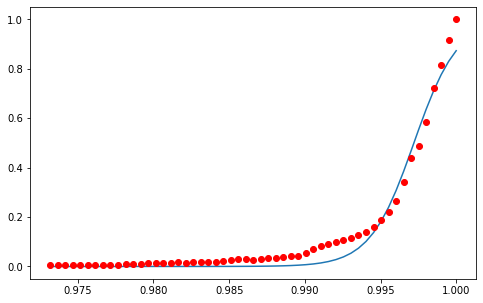

In [82]:
plt.figure(figsize=(8,5))
# beta_1 = popt[0]
# beta_2 = popt[1]
beta_1 = 690.451712
beta_2 = 0.997207
Y_pred = sigmoid(n_x_data, beta_1 , beta_2)
plt.plot(n_x_data, Y_pred)
plt.plot(n_x_data, n_y_data, 'ro')

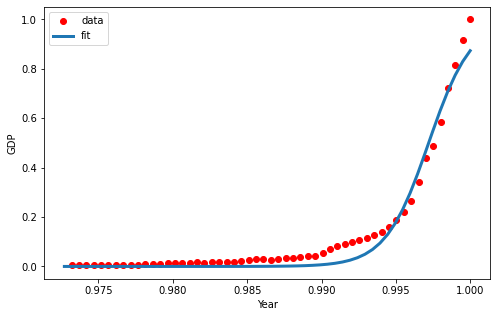

In [74]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(n_x_data, n_y_data, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()